In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
product_data = pd.read_csv("./dataset/product_data.csv")
freezer_data = pd.read_csv("./dataset/freezer_data.csv")
outlets_data = pd.read_csv("./dataset/outlets_data.csv")
sales_data = pd.read_csv("./dataset/sales_data.csv")
week_data = pd.read_csv("./dataset/week_data.csv")

In [10]:
product_data.head()

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100


In [11]:
product_data.describe()

,volume,price
count,10.000000,10.000000
mean,0.600000,605.000000
std,0.421637,534.628635
min,0.200000,90.000000
25%,0.200000,100.000000
50%,0.600000,555.000000
75%,1.000000,1100.000000
max,1.000000,1200.000000


In [96]:
sales_data.head()
# join the product data price and volume colume to sales_data_df
sales_data = sales_data.merge(
    product_data[["product_name", "price", "volume"]], on="product_name", how="left"
)
sales_data.head()

,Outlet_ID,week,pid,product_name,no_units,price,volume
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100,0.2
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90,0.2
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110,0.2
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100,0.2
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100,0.2


In [24]:
sales_data.describe()

,week,no_units
count,81000.000000,81000.000000
mean,6.504432,373.143543
std,3.453426,370.546966
min,1.000000,20.000000
25%,4.000000,79.000000
50%,7.000000,210.000000
75%,10.000000,593.000000
max,12.000000,1499.000000


In [101]:
freezer_data.head(10)

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


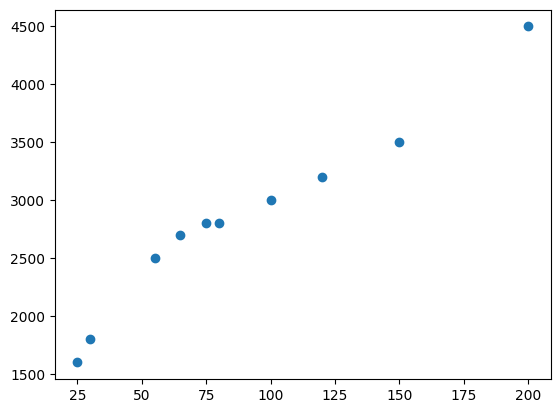

In [102]:
# plot volume Capacity vs Power Consumption
plt.scatter(freezer_data["Volume Capacity (Liters)"], freezer_data["Power and maitainance Cost (LKR) per 100 hours"])

In [15]:
outlets_data.head()

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100


In [18]:
outlets_data.describe()

,area(sqft)
count,988.000000
mean,4288.656883
std,2451.617799
min,123.000000
25%,2325.750000
50%,3958.500000
75%,5836.000000
max,9950.000000


In [21]:
week_data.head(12)

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [20]:
week_data.describe()

,Week,Start Date,End Date
count,12,12,12
unique,12,12,12
top,Week 1,1/2/2023,1/8/2023
freq,1,1,1


In [43]:
outlet_ids = outlets_data["Outlet_ID"].unique()

# show rows with duplicate outlet ids
outlets_data[outlets_data.duplicated(["Outlet_ID"], keep=False)].sort_values(
    by=["Outlet_ID", "area(sqft)"], ascending=False
)

,Outlet_ID,area(sqft)
680,ID9980,7527
449,ID9980,4256
916,ID9841,2179
418,ID9841,578
576,ID9672,7966
...,...,...
292,ID1485,4535
851,ID1429,2854
399,ID1429,1300
98,ID1365,5823


In [38]:
sales_data[sales_data["Outlet_ID"] == "ID7203"].groupby("Outlet_ID")["no_units"].mean()

Outlet_ID
ID7203    655.584906
Name: no_units, dtype: float64

In [97]:
sales_data['total_earning'] = sales_data['price'] * sales_data['no_units']
sales_data.head()

,Outlet_ID,week,pid,product_name,no_units,price,volume,total_earning
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100,0.2,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90,0.2,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110,0.2,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100,0.2,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100,0.2,71000.0


In [125]:

uniq_outlets_df = outlets_data.drop_duplicates(subset=["Outlet_ID"]).copy()
uniq_outlets_df.drop(["area(sqft)"], axis=1, inplace=True)
uniq_product_names = sales_data["product_name"].unique()

for prod in uniq_product_names:
    prod_sales = sales_data[sales_data["product_name"] == prod].groupby("Outlet_ID")["no_units"].sum().reset_index(name=f"{prod}_sales")
    uniq_outlets_df = uniq_outlets_df.merge(prod_sales, on="Outlet_ID", how="left")

uniq_outlets_df.head(300)

,Outlet_ID,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,Cookies and Cream Mega Tub_sales
0,ID7203,6361.0,7295.0,9127.0,5520.0,6443.0,NaN,NaN,NaN,NaN,NaN
1,ID1878,7860.0,6622.0,6856.0,7954.0,6748.0,NaN,NaN,NaN,NaN,NaN
2,ID1740,7625.0,8116.0,7837.0,7192.0,6817.0,NaN,NaN,NaN,NaN,NaN
3,ID4366,6530.0,6259.0,9232.0,8759.0,9524.0,NaN,NaN,NaN,NaN,NaN
4,ID8358,7057.0,9562.0,7652.0,6241.0,8866.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,ID9762,NaN,NaN,NaN,NaN,NaN,1109.0,1112.0,1087.0,1426.0,1049.0
296,ID4857,NaN,NaN,NaN,NaN,NaN,1464.0,1235.0,1450.0,1416.0,1421.0
297,ID2611,NaN,NaN,NaN,NaN,NaN,1519.0,1414.0,970.0,1107.0,1513.0
298,ID1954,NaN,NaN,NaN,NaN,NaN,1577.0,1134.0,1405.0,1063.0,1426.0


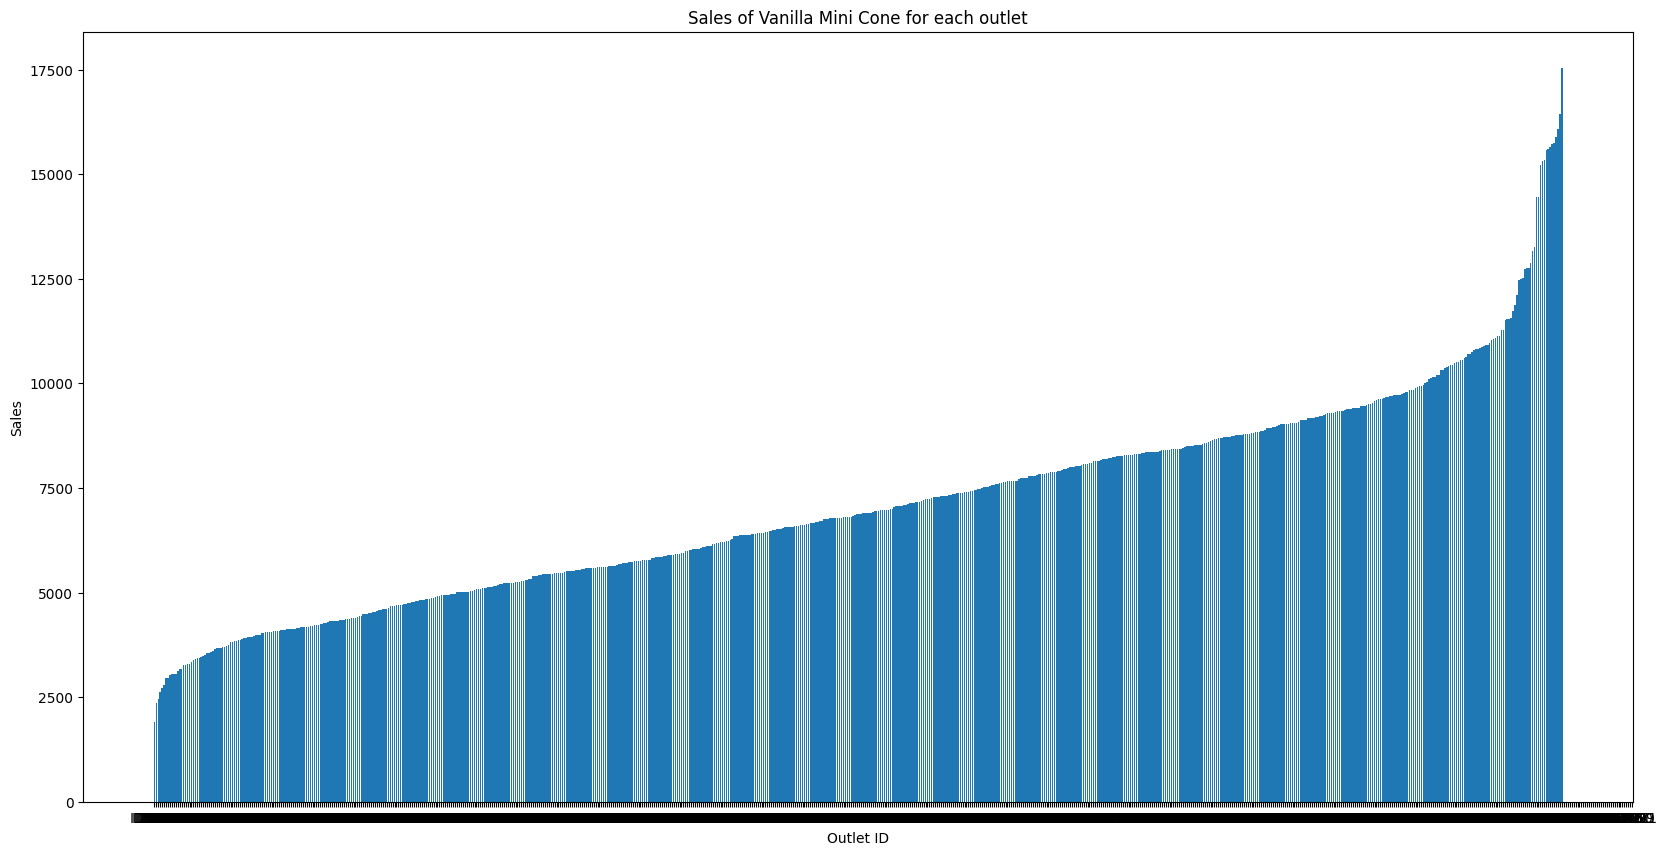

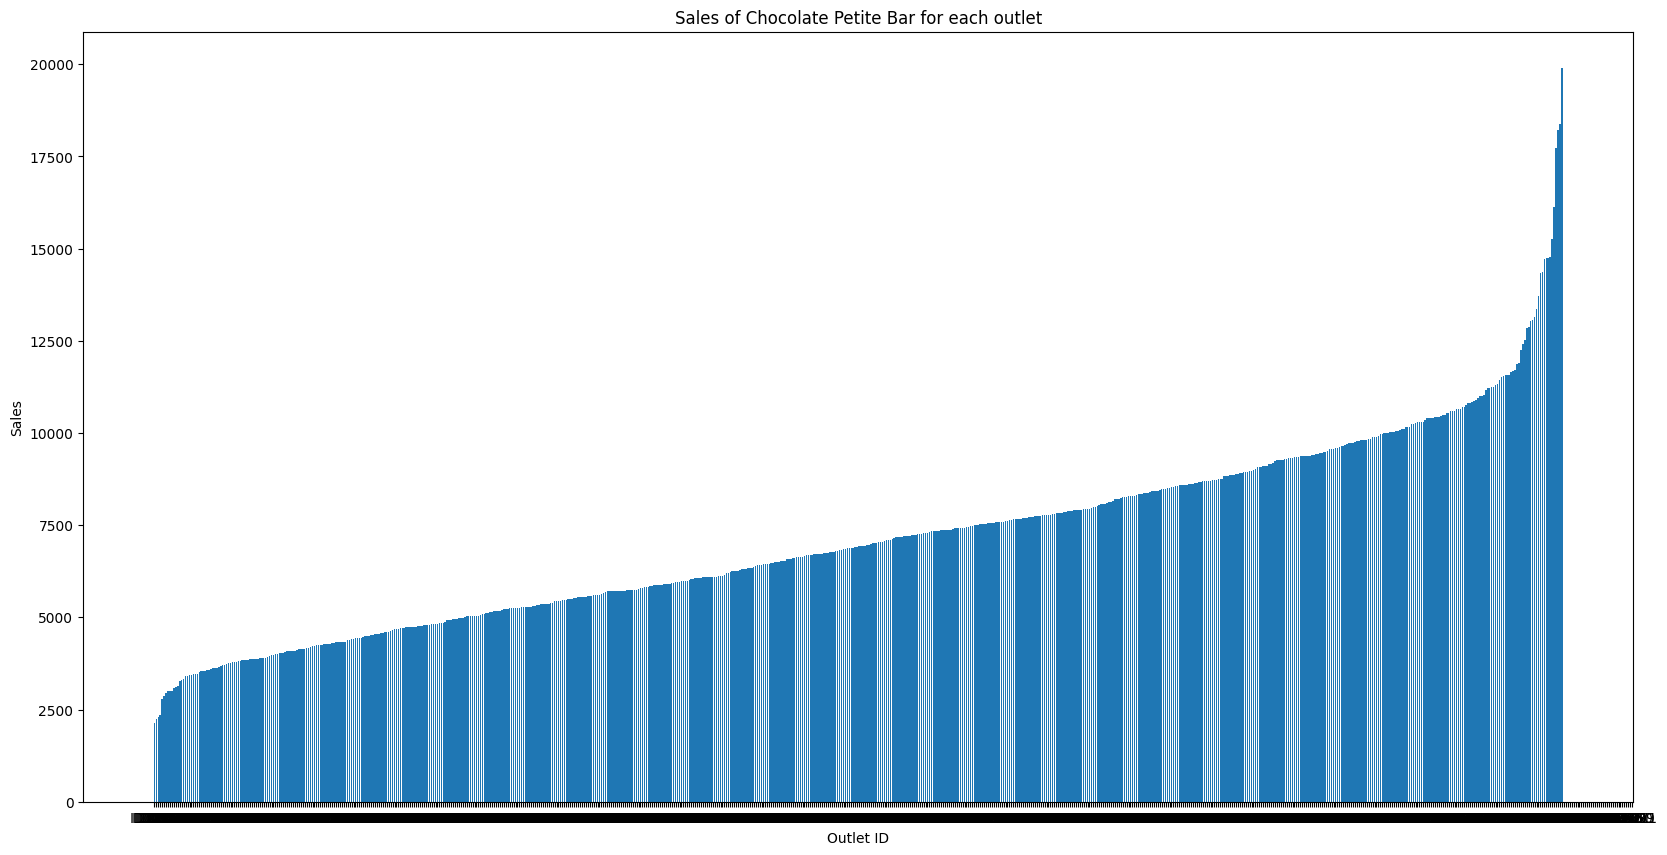

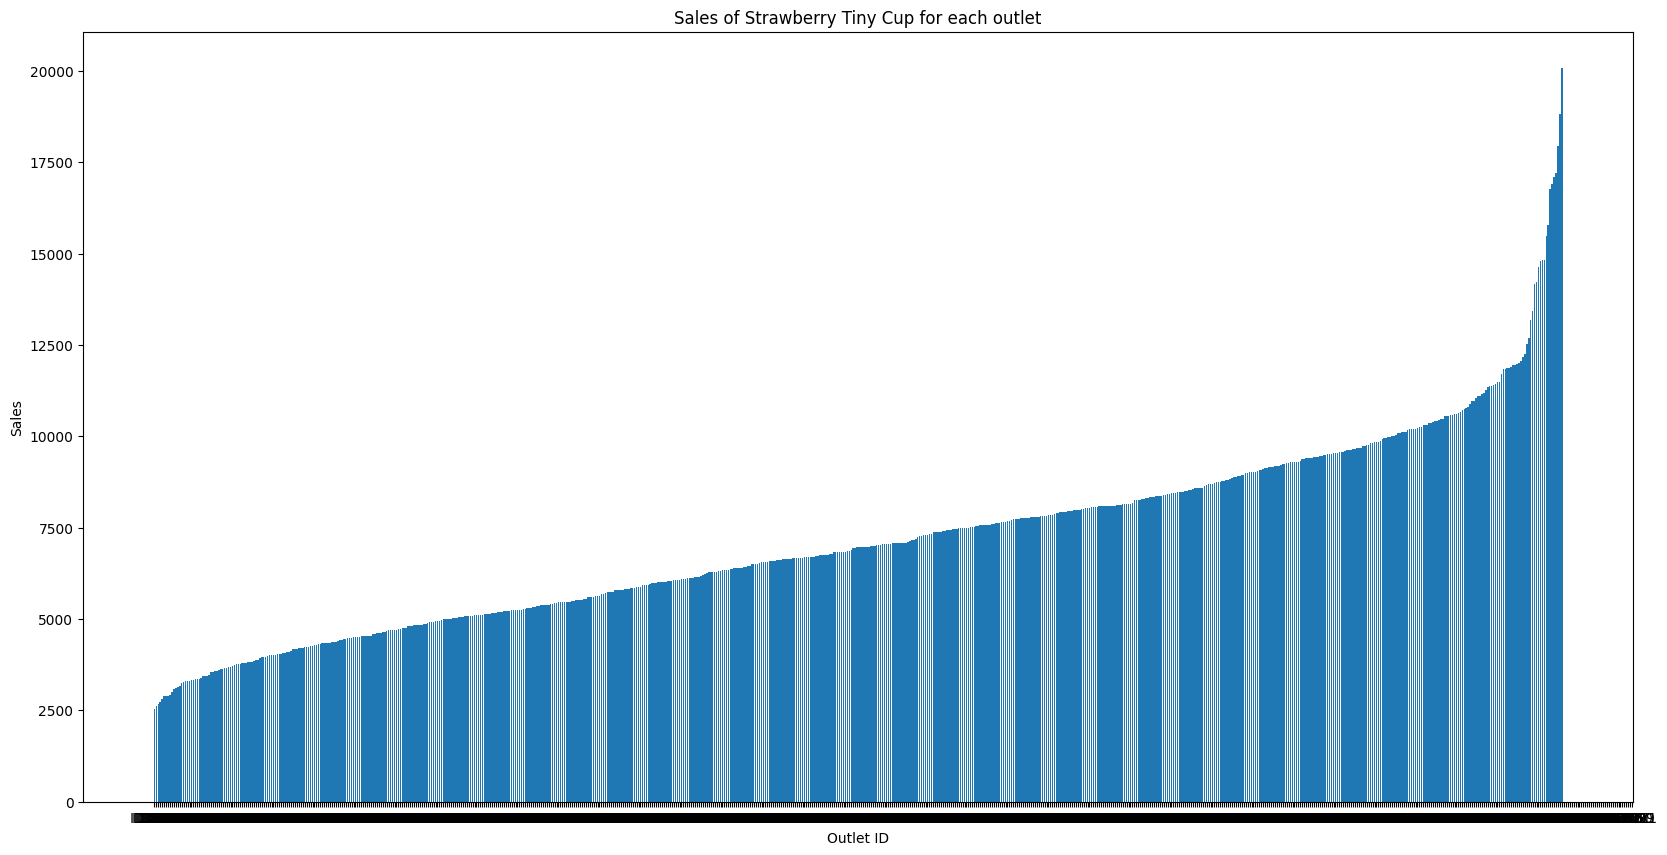

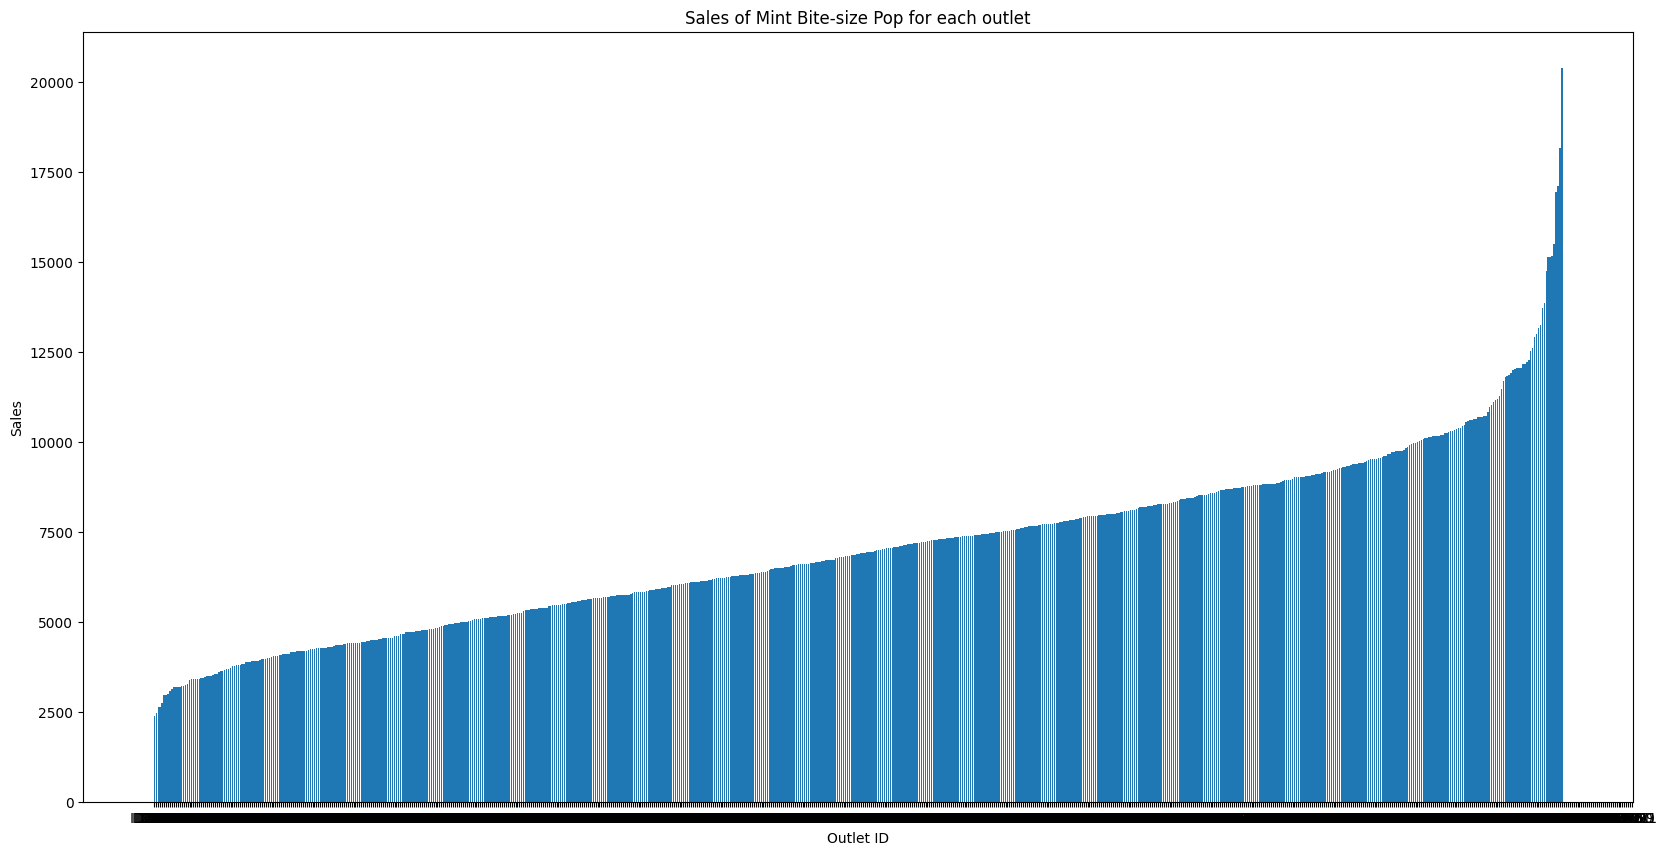

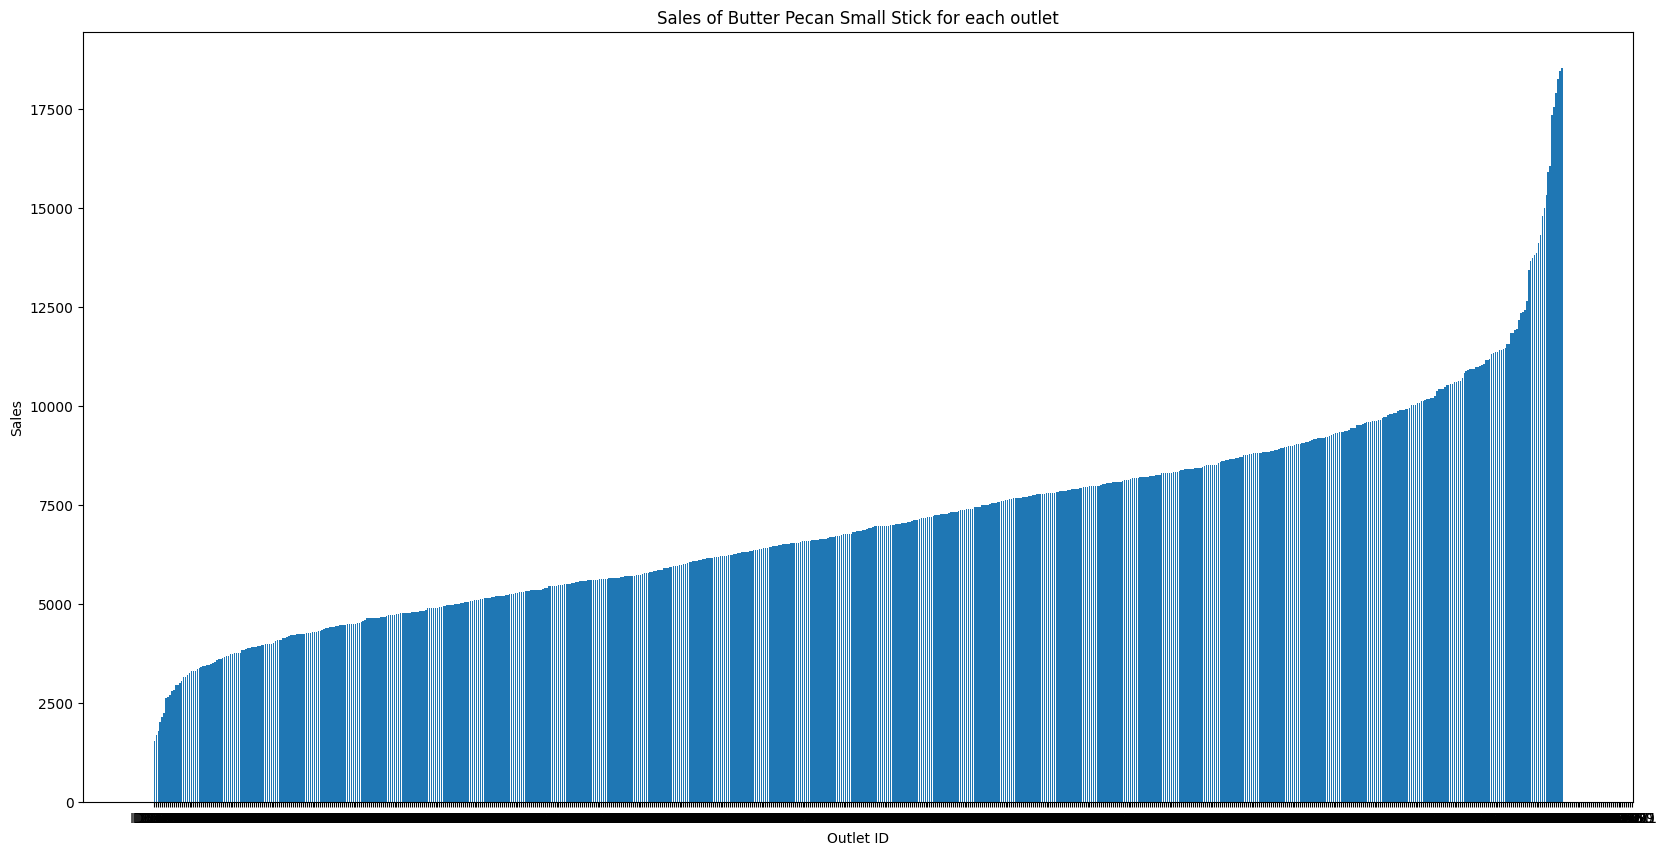

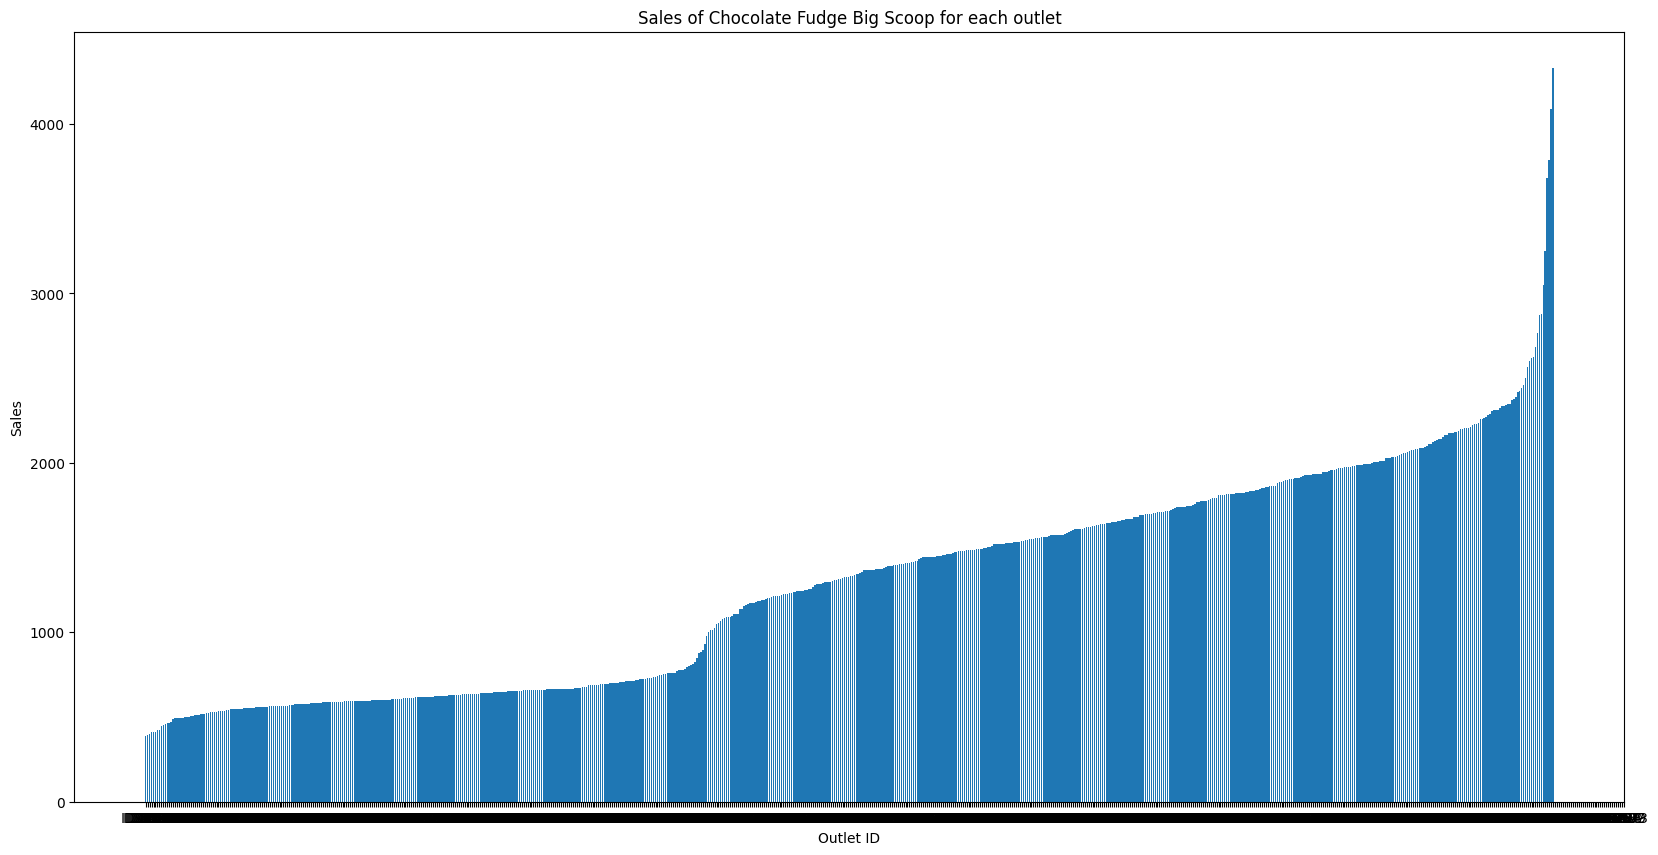

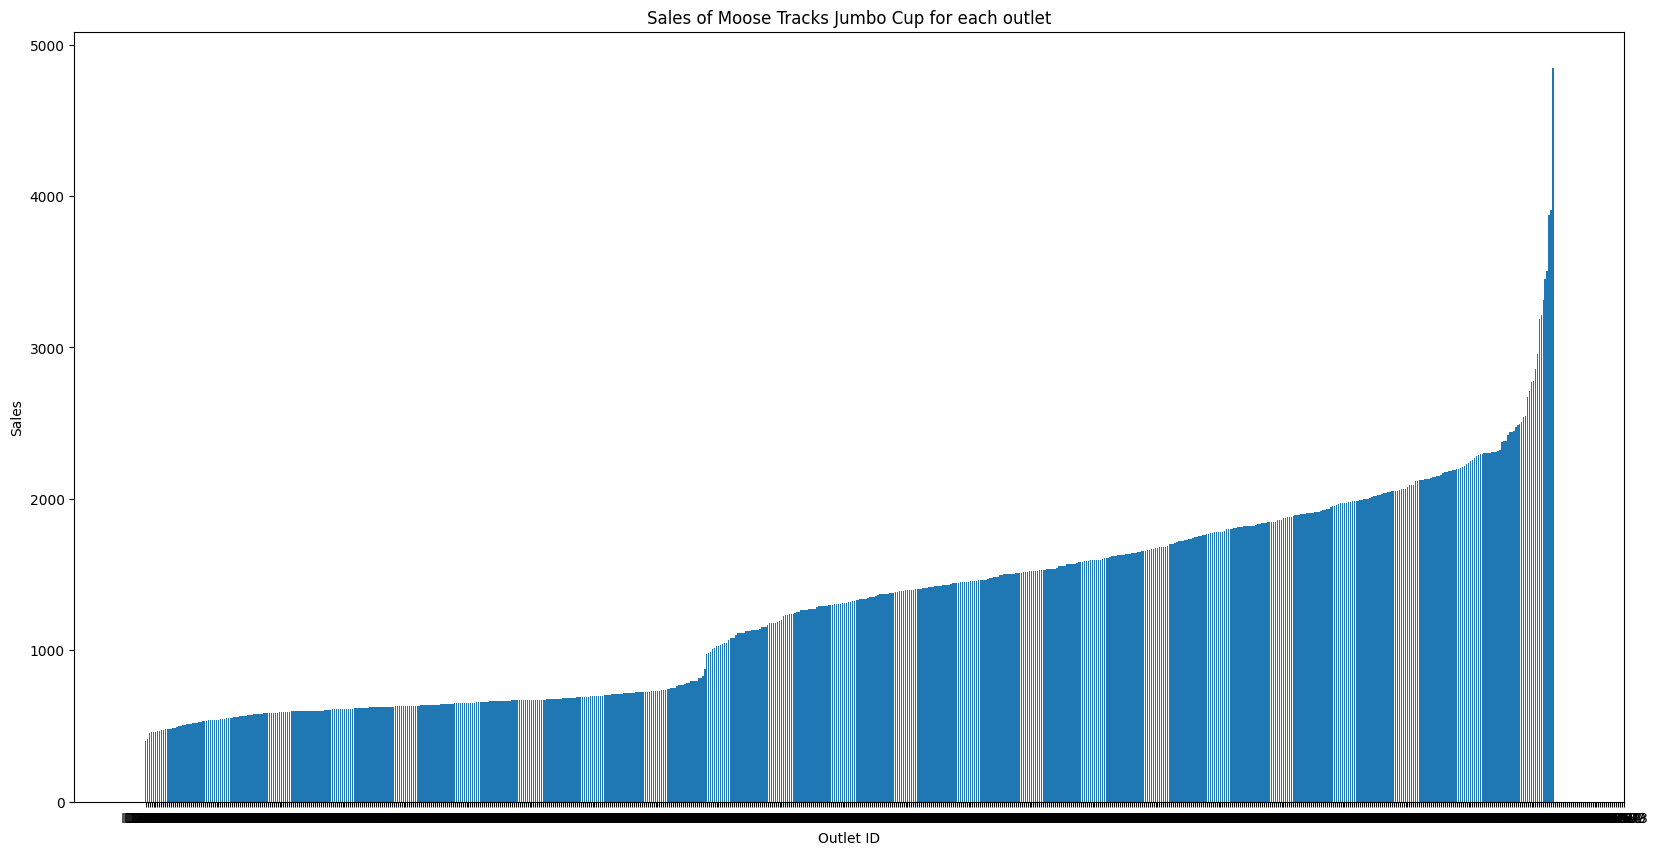

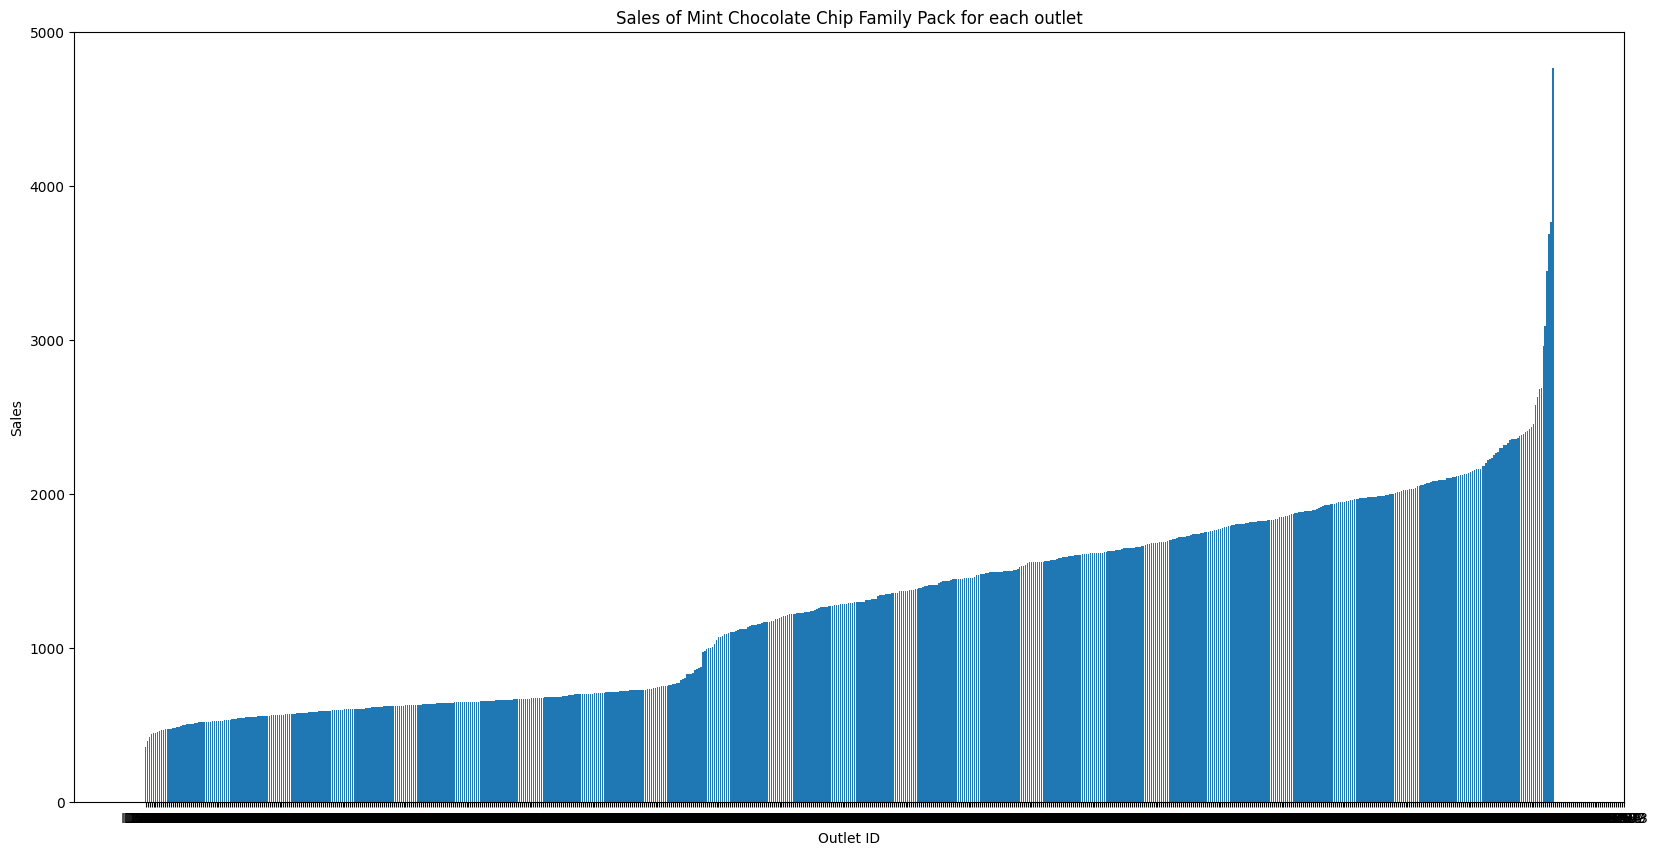

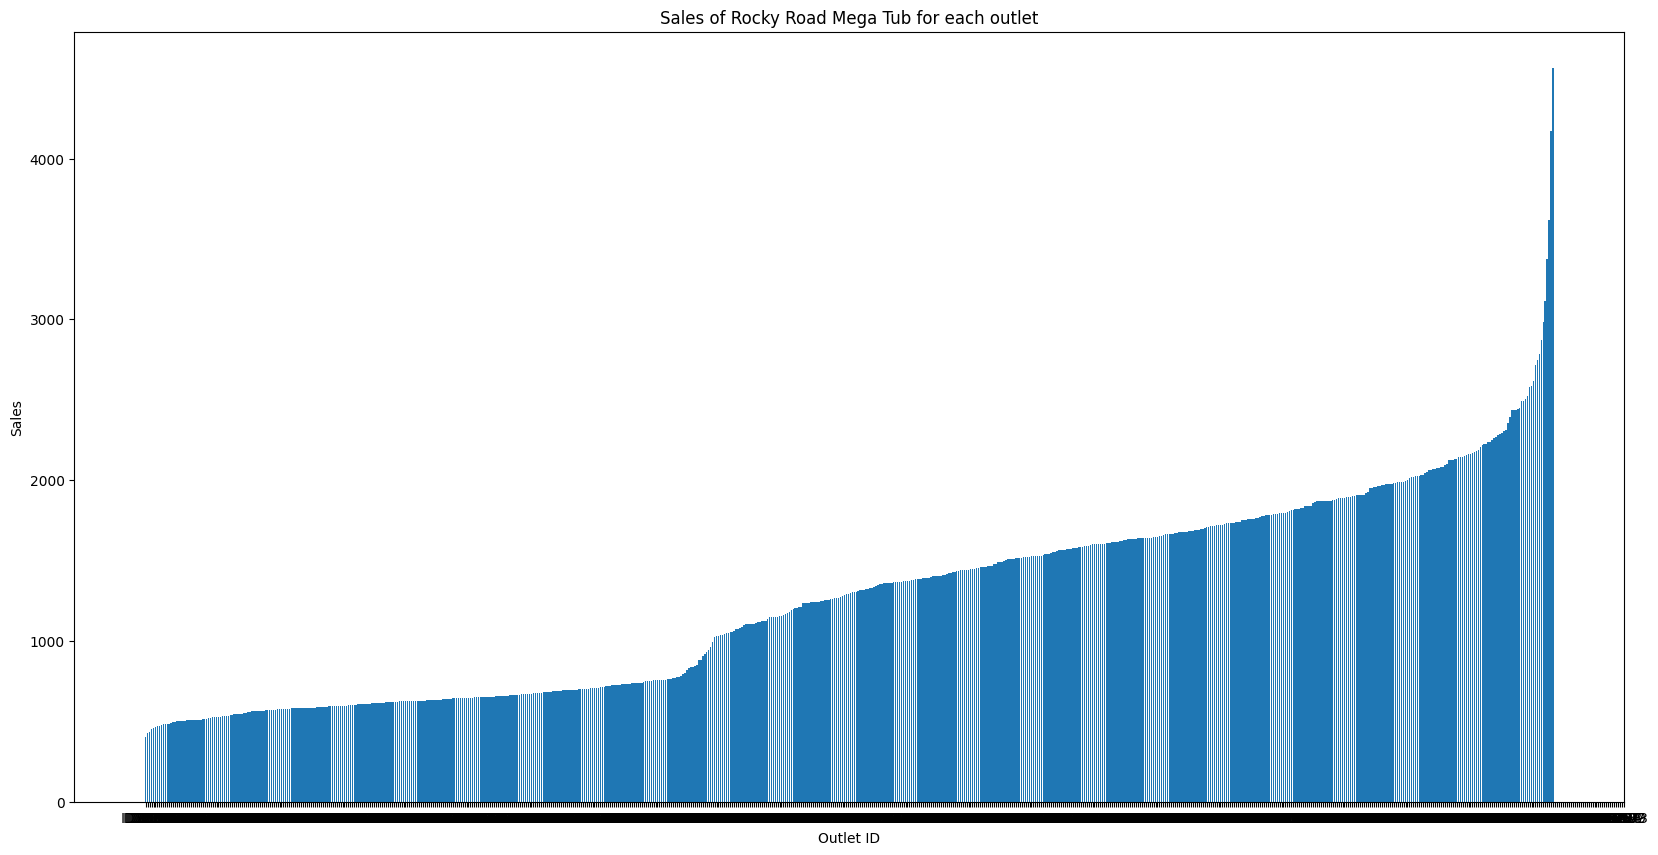

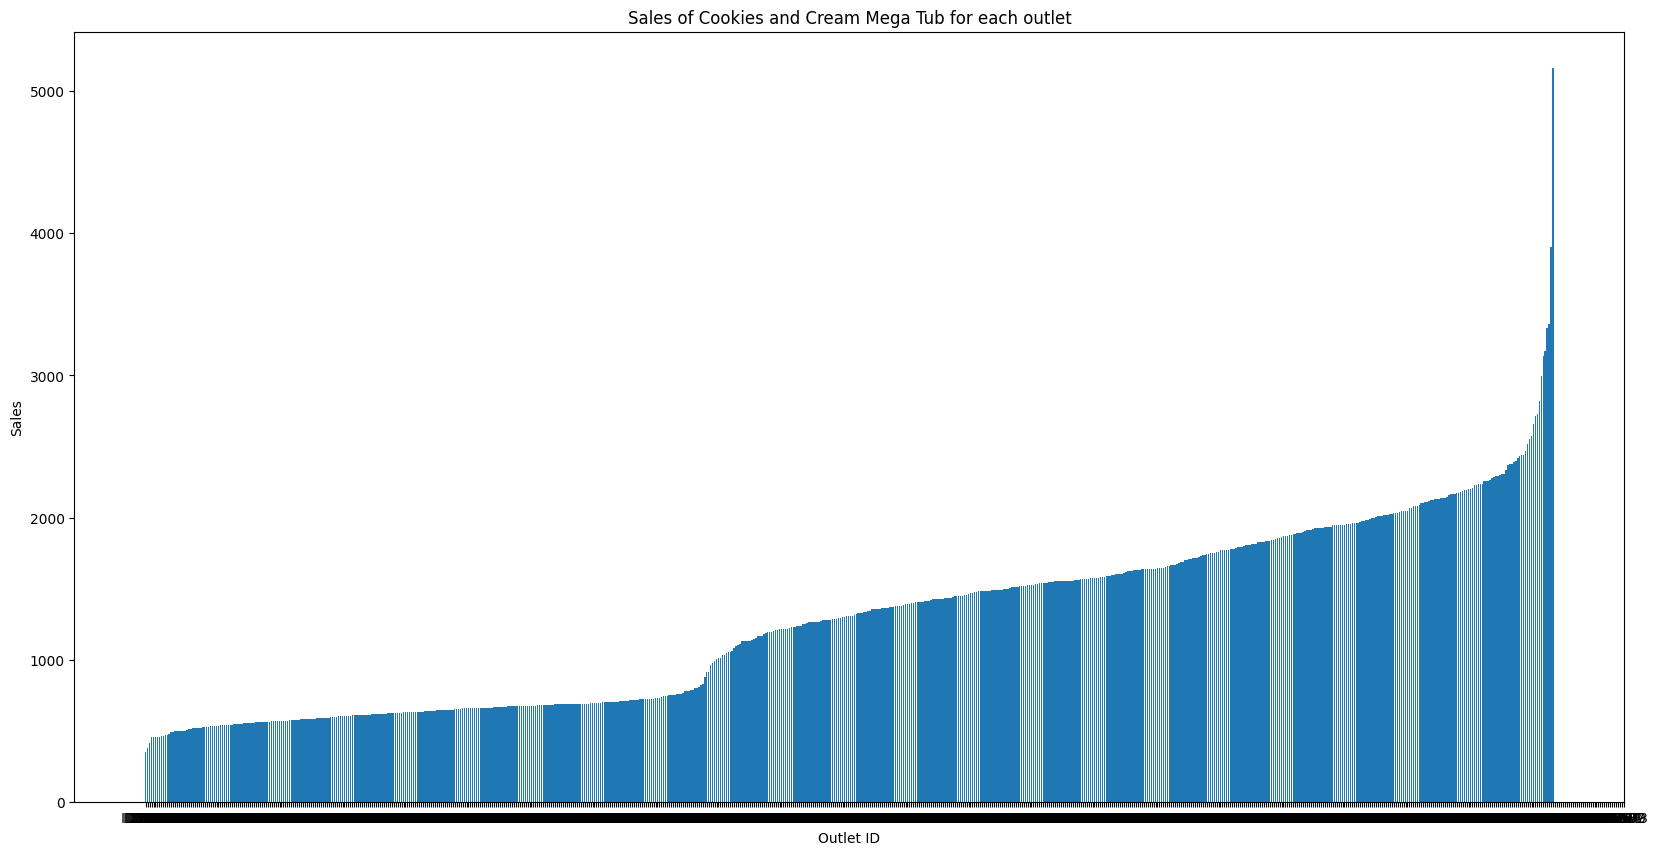

In [93]:
# plot sales of each item for each outlet
for prod in uniq_product_names:
    uniq_outlets_df_ = uniq_outlets_df.copy().sort_values(by=[f"{prod}_sales"])
    plt.figure(figsize=(20, 10))
    plt.title(f"Sales of {prod} for each outlet")
    plt.xlabel("Outlet ID")
    plt.ylabel("Sales")
    plt.bar(uniq_outlets_df_["Outlet_ID"], uniq_outlets_df_[f"{prod}_sales"])
    plt.show()

In [126]:
uniq_product_names

array(['Vanilla Mini Cone', 'Chocolate Petite Bar', 'Strawberry Tiny Cup',
       'Mint Bite-size Pop', 'Butter Pecan Small Stick',
       'Chocolate Fudge Big Scoop', 'Moose Tracks Jumbo Cup',
       'Mint Chocolate Chip Family Pack', 'Rocky Road Mega Tub',
       'Cookies and Cream Mega Tub'], dtype=object)

In [127]:
# add sales for all weeks
for i in range(1, 13):
    sales = sales_data[sales_data["week"] == i].groupby("Outlet_ID")["no_units"].sum().reset_index(name=f"week{i}_sales")
    uniq_outlets_df = uniq_outlets_df.merge(sales, on="Outlet_ID", how="left")

<BarContainer object of 951 artists>

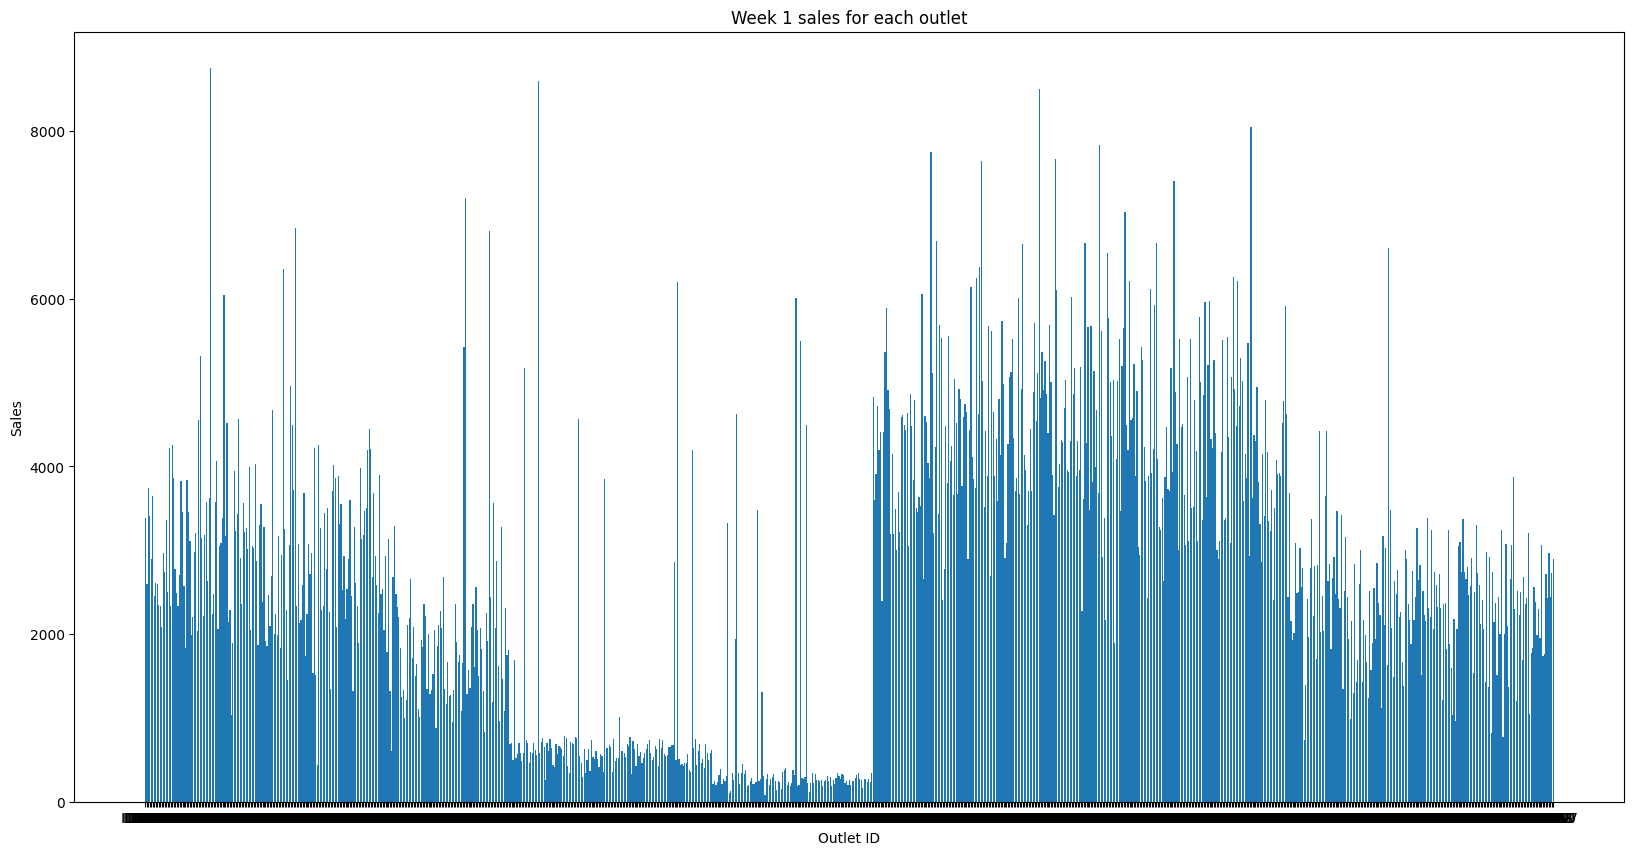

In [76]:
# plot week1 sales
plt.figure(figsize=(20, 10))
plt.title("Week 1 sales for each outlet")
plt.xlabel("Outlet ID")
plt.ylabel("Sales")
plt.bar(uniq_outlets_df["Outlet_ID"], uniq_outlets_df["week1_sales"])

In [128]:
# total units sold per outlet
total_units_sold = sales_data.groupby("Outlet_ID")["no_units"].sum().reset_index(name="total_units_sold")
uniq_outlets_df = uniq_outlets_df.merge(total_units_sold, on="Outlet_ID", how="left")

uniq_outlets_df


,Outlet_ID,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,...,week4_sales,week5_sales,week6_sales,week7_sales,week8_sales,week9_sales,week10_sales,week11_sales,week12_sales,total_units_sold
0,ID7203,6361.0,7295.0,9127.0,5520.0,6443.0,NaN,NaN,NaN,NaN,...,2583.0,2802.0,3227.0,2992.0,3138.0,2309.0,2484.0,4382.0,2233.0,34746.0
1,ID1878,7860.0,6622.0,6856.0,7954.0,6748.0,NaN,NaN,NaN,NaN,...,3724.0,3213.0,3313.0,2883.0,3501.0,3312.0,3961.0,2210.0,2469.0,36040.0
2,ID1740,7625.0,8116.0,7837.0,7192.0,6817.0,NaN,NaN,NaN,NaN,...,3060.0,3822.0,3190.0,2138.0,2812.0,2072.0,3081.0,3693.0,3067.0,37587.0
3,ID4366,6530.0,6259.0,9232.0,8759.0,9524.0,NaN,NaN,NaN,NaN,...,4036.0,2328.0,2454.0,3181.0,3025.0,3975.0,4975.0,2426.0,3579.0,40304.0
4,ID8358,7057.0,9562.0,7652.0,6241.0,8866.0,NaN,NaN,NaN,NaN,...,4552.0,1080.0,3598.0,3164.0,3497.0,3738.0,2831.0,2338.0,4071.0,39378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,4179.0,5104.0,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,...,2025.0,3133.0,2046.0,1998.0,1909.0,2352.0,1637.0,2326.0,2315.0,26713.0
947,ID2978,4092.0,5710.0,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,...,2879.0,996.0,3063.0,2525.0,2007.0,1786.0,2528.0,1919.0,3256.0,27695.0
948,ID6549,4932.0,6148.0,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,...,2988.0,3001.0,2743.0,2085.0,2838.0,1903.0,1699.0,3279.0,2753.0,30974.0
949,ID1210,4745.0,7020.0,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,...,3856.0,1667.0,1378.0,2873.0,1994.0,3625.0,1819.0,2767.0,2444.0,30634.0


In [129]:
sorted_outlets_df = uniq_outlets_df.sort_values(by=["total_units_sold"], ascending=False)

<BarContainer object of 951 artists>

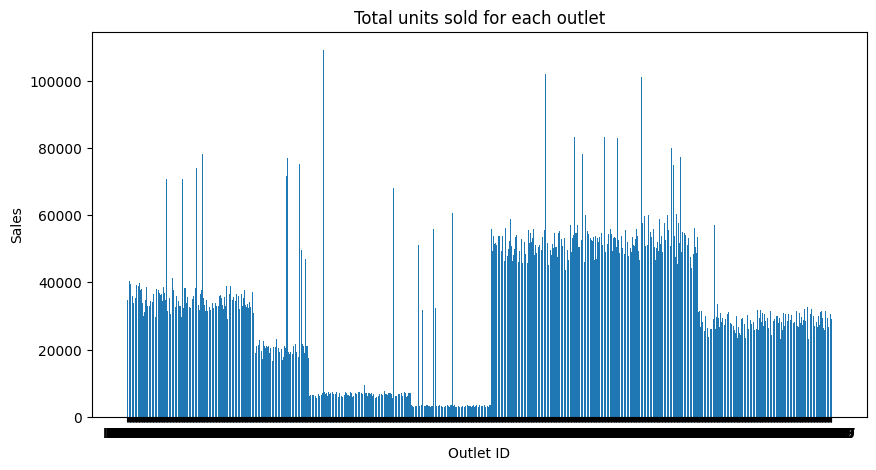

In [92]:
# plot total units sold
plt.figure(figsize=(10, 5))
plt.title("Total units sold for each outlet")
plt.xlabel("Outlet ID")
plt.ylabel("Sales")
plt.bar(uniq_outlets_df["Outlet_ID"], uniq_outlets_df["total_units_sold"])

In [130]:
total_sales_per_outlet = sales_data.groupby("Outlet_ID")["total_earning"].sum().reset_index(name="total_sales")
uniq_outlets_df = uniq_outlets_df.merge(total_sales_per_outlet, on="Outlet_ID", how="left")

uniq_outlets_df.head()

,Outlet_ID,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,...,week5_sales,week6_sales,week7_sales,week8_sales,week9_sales,week10_sales,week11_sales,week12_sales,total_units_sold,total_sales
0,ID7203,6361.0,7295.0,9127.0,5520.0,6443.0,NaN,NaN,NaN,NaN,...,2802.0,3227.0,2992.0,3138.0,2309.0,2484.0,4382.0,2233.0,34746.0,3492920.0
1,ID1878,7860.0,6622.0,6856.0,7954.0,6748.0,NaN,NaN,NaN,NaN,...,3213.0,3313.0,2883.0,3501.0,3312.0,3961.0,2210.0,2469.0,36040.0,3606340.0
2,ID1740,7625.0,8116.0,7837.0,7192.0,6817.0,NaN,NaN,NaN,NaN,...,3822.0,3190.0,2138.0,2812.0,2072.0,3081.0,3693.0,3067.0,37587.0,3755910.0
3,ID4366,6530.0,6259.0,9232.0,8759.0,9524.0,NaN,NaN,NaN,NaN,...,2328.0,2454.0,3181.0,3025.0,3975.0,4975.0,2426.0,3579.0,40304.0,4060130.0
4,ID8358,7057.0,9562.0,7652.0,6241.0,8866.0,NaN,NaN,NaN,NaN,...,1080.0,3598.0,3164.0,3497.0,3738.0,2831.0,2338.0,4071.0,39378.0,3918700.0


<BarContainer object of 951 artists>

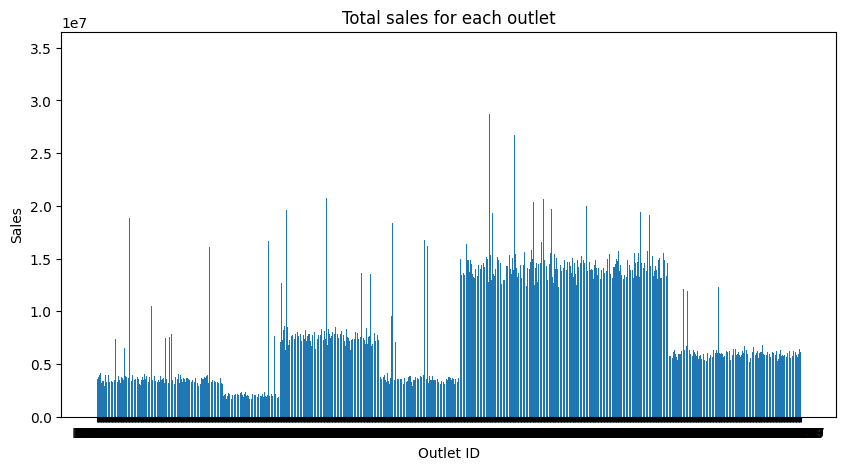

In [100]:
# plot total sales
plt.figure(figsize=(10, 5))
plt.title("Total sales for each outlet")
plt.xlabel("Outlet ID")
plt.ylabel("Sales")
plt.bar(uniq_outlets_df["Outlet_ID"], uniq_outlets_df["total_sales"])   

In [103]:
uniq_outlets_df

,Outlet_ID,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,Cookies and Cream Mega Tub_sales,week1_sales,total_units_sold,total_sales
0,ID7203,6361.0,7295.0,9127.0,5520.0,6443.0,NaN,NaN,NaN,NaN,NaN,3389.0,34746.0,3492920.0
1,ID1878,7860.0,6622.0,6856.0,7954.0,6748.0,NaN,NaN,NaN,NaN,NaN,2597.0,36040.0,3606340.0
2,ID1740,7625.0,8116.0,7837.0,7192.0,6817.0,NaN,NaN,NaN,NaN,NaN,3742.0,37587.0,3755910.0
3,ID4366,6530.0,6259.0,9232.0,8759.0,9524.0,NaN,NaN,NaN,NaN,NaN,3410.0,40304.0,4060130.0
4,ID8358,7057.0,9562.0,7652.0,6241.0,8866.0,NaN,NaN,NaN,NaN,NaN,2891.0,39378.0,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,4179.0,5104.0,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,573.0,2436.0,26713.0,5631520.0
947,ID2978,4092.0,5710.0,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,679.0,2969.0,27695.0,5942690.0
948,ID6549,4932.0,6148.0,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,543.0,2441.0,30974.0,6409630.0
949,ID1210,4745.0,7020.0,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,677.0,2725.0,30634.0,6072600.0


In [131]:
# Scale using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_outlets_df = scaler.fit_transform(uniq_outlets_df.drop(["Outlet_ID"], axis=1))
scaled_outlets_df = pd.DataFrame(scaled_outlets_df, columns=uniq_outlets_df.columns[1:])
scaled_outlets_df.head()

,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,Cookies and Cream Mega Tub_sales,...,week5_sales,week6_sales,week7_sales,week8_sales,week9_sales,week10_sales,week11_sales,week12_sales,total_units_sold,total_sales
0,-0.293777,0.061452,0.756013,-0.624813,-0.250256,NaN,NaN,NaN,NaN,NaN,...,0.104471,0.344982,0.195030,0.252790,-0.170226,-0.100103,0.974889,-0.241239,0.152206,-0.903290
1,0.311575,-0.202623,-0.124121,0.369265,-0.130757,NaN,NaN,NaN,NaN,NaN,...,0.341795,0.393907,0.133532,0.454835,0.400369,0.732493,-0.251398,-0.106648,0.218654,-0.880719
2,0.216673,0.383602,0.256069,0.058054,-0.103723,NaN,NaN,NaN,NaN,NaN,...,0.693450,0.323933,-0.286800,0.071339,-0.305053,0.236430,0.585887,0.234391,0.298093,-0.850955
3,-0.225528,-0.345060,0.796706,0.698038,0.956880,NaN,NaN,NaN,NaN,NaN,...,-0.169231,-0.094778,0.301664,0.189894,0.777543,1.304092,-0.129447,0.526385,0.437613,-0.790415
4,-0.012706,0.950992,0.184371,-0.330347,0.699076,NaN,NaN,NaN,NaN,NaN,...,-0.889864,0.556044,0.292073,0.452608,0.642716,0.095504,-0.179131,0.806973,0.390062,-0.818560


In [132]:
# replace nan values with 0
scaled_outlets_df.fillna(0, inplace=True)
scaled_outlets_df.head()

,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,Cookies and Cream Mega Tub_sales,...,week5_sales,week6_sales,week7_sales,week8_sales,week9_sales,week10_sales,week11_sales,week12_sales,total_units_sold,total_sales
0,-0.293777,0.061452,0.756013,-0.624813,-0.250256,0.0,0.0,0.0,0.0,0.0,...,0.104471,0.344982,0.195030,0.252790,-0.170226,-0.100103,0.974889,-0.241239,0.152206,-0.903290
1,0.311575,-0.202623,-0.124121,0.369265,-0.130757,0.0,0.0,0.0,0.0,0.0,...,0.341795,0.393907,0.133532,0.454835,0.400369,0.732493,-0.251398,-0.106648,0.218654,-0.880719
2,0.216673,0.383602,0.256069,0.058054,-0.103723,0.0,0.0,0.0,0.0,0.0,...,0.693450,0.323933,-0.286800,0.071339,-0.305053,0.236430,0.585887,0.234391,0.298093,-0.850955
3,-0.225528,-0.345060,0.796706,0.698038,0.956880,0.0,0.0,0.0,0.0,0.0,...,-0.169231,-0.094778,0.301664,0.189894,0.777543,1.304092,-0.129447,0.526385,0.437613,-0.790415
4,-0.012706,0.950992,0.184371,-0.330347,0.699076,0.0,0.0,0.0,0.0,0.0,...,-0.889864,0.556044,0.292073,0.452608,0.642716,0.095504,-0.179131,0.806973,0.390062,-0.818560


In [133]:
# Use k-means clustering to cluster the outlets
from sklearn.cluster import KMeans
uniq_outlets_df_ = scaled_outlets_df.copy()
kmeans = KMeans(n_clusters=7, random_state=0).fit(uniq_outlets_df_[["total_sales", "total_units_sold"]])

uniq_outlets_df_["cluster"] = kmeans.labels_

uniq_outlets_df_.head()

c:\Users\chainksword\Documents\DataStorm4\DataStorm-4.0-BrainLeftException-SemiFinals\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Vanilla Mini Cone_sales,Chocolate Petite Bar_sales,Strawberry Tiny Cup_sales,Mint Bite-size Pop_sales,Butter Pecan Small Stick_sales,Chocolate Fudge Big Scoop_sales,Moose Tracks Jumbo Cup_sales,Mint Chocolate Chip Family Pack_sales,Rocky Road Mega Tub_sales,Cookies and Cream Mega Tub_sales,...,week6_sales,week7_sales,week8_sales,week9_sales,week10_sales,week11_sales,week12_sales,total_units_sold,total_sales,cluster
0,-0.293777,0.061452,0.756013,-0.624813,-0.250256,0.0,0.0,0.0,0.0,0.0,...,0.344982,0.195030,0.252790,-0.170226,-0.100103,0.974889,-0.241239,0.152206,-0.903290,6
1,0.311575,-0.202623,-0.124121,0.369265,-0.130757,0.0,0.0,0.0,0.0,0.0,...,0.393907,0.133532,0.454835,0.400369,0.732493,-0.251398,-0.106648,0.218654,-0.880719,6
2,0.216673,0.383602,0.256069,0.058054,-0.103723,0.0,0.0,0.0,0.0,0.0,...,0.323933,-0.286800,0.071339,-0.305053,0.236430,0.585887,0.234391,0.298093,-0.850955,6
3,-0.225528,-0.345060,0.796706,0.698038,0.956880,0.0,0.0,0.0,0.0,0.0,...,-0.094778,0.301664,0.189894,0.777543,1.304092,-0.129447,0.526385,0.437613,-0.790415,6
4,-0.012706,0.950992,0.184371,-0.330347,0.699076,0.0,0.0,0.0,0.0,0.0,...,0.556044,0.292073,0.452608,0.642716,0.095504,-0.179131,0.806973,0.390062,-0.818560,6


In [144]:
uniq_outlets_df_.shape

(951, 25)

In [134]:
print("Inertia: ", kmeans.inertia_)

Inertia:  77.90242705033424


In [161]:
# use the elbow method to find the optimal number of clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

inertia = []

silhouette_scores = []
db_scores = []
ch_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=30).fit(uniq_outlets_df_)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(uniq_outlets_df_, labels))
    db_scores.append(davies_bouldin_score(uniq_outlets_df_, labels))
    ch_scores.append(calinski_harabasz_score(uniq_outlets_df_, labels))


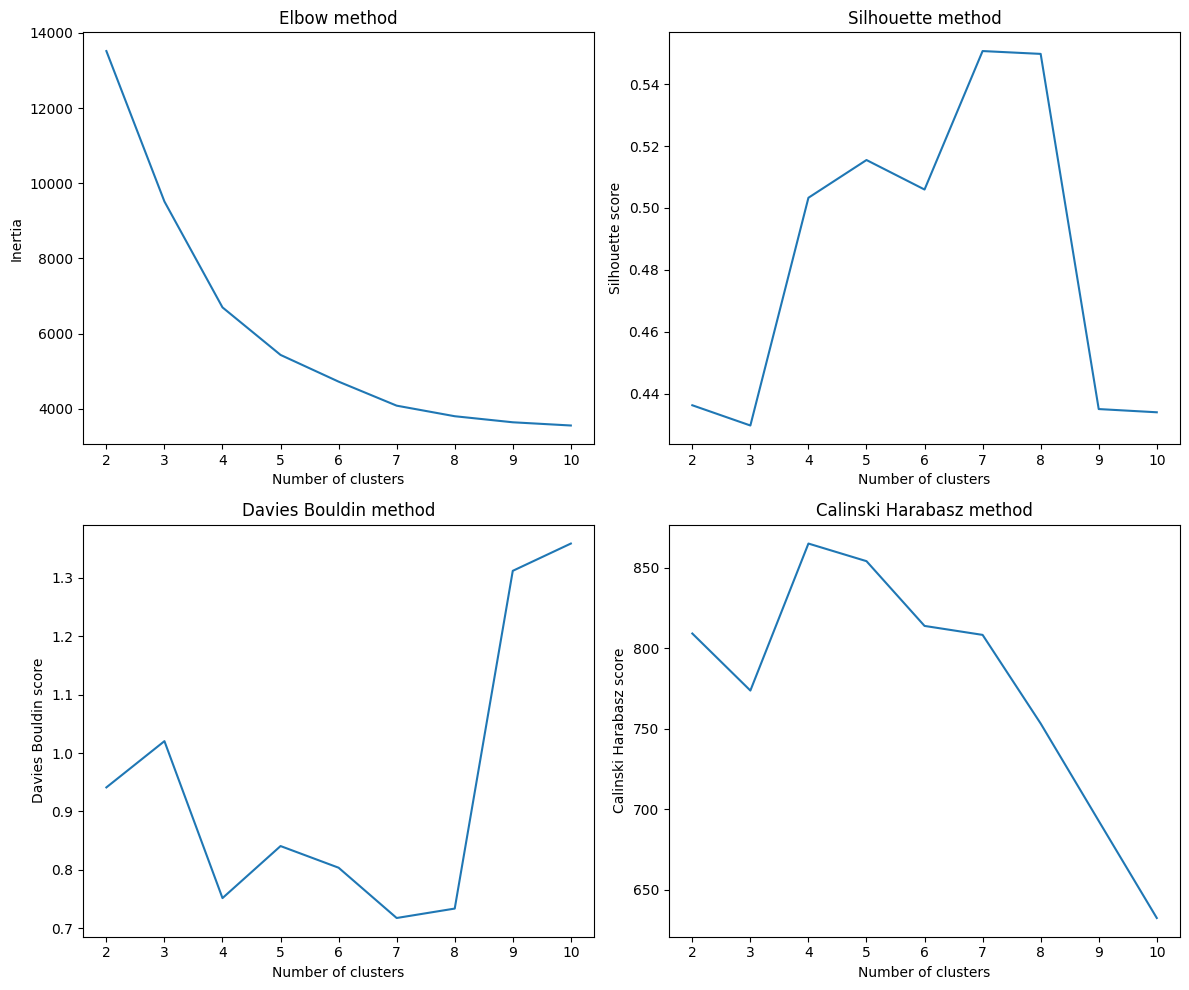

In [162]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Elbow method plot
axs[0, 0].plot(range(2, 11), inertia)
axs[0, 0].set_title("Elbow method")
axs[0, 0].set_xlabel("Number of clusters")
axs[0, 0].set_ylabel("Inertia")

# Silhouette method plot
axs[0, 1].plot(range(2, 11), silhouette_scores)
axs[0, 1].set_title("Silhouette method")
axs[0, 1].set_xlabel("Number of clusters")
axs[0, 1].set_ylabel("Silhouette score")

# Davies Bouldin method plot
axs[1, 0].plot(range(2, 11), db_scores)
axs[1, 0].set_title("Davies Bouldin method")
axs[1, 0].set_xlabel("Number of clusters")
axs[1, 0].set_ylabel("Davies Bouldin score")

# Calinski Harabasz method plot
axs[1, 1].plot(range(2, 11), ch_scores)
axs[1, 1].set_title("Calinski Harabasz method")
axs[1, 1].set_xlabel("Number of clusters")
axs[1, 1].set_ylabel("Calinski Harabasz score")

plt.tight_layout()
plt.show()

In [124]:
uniq_outlets_df.to_csv("uniq_outlets_df.csv", index=False)

In [163]:
sandil_df = pd.read_csv("encoded_outlets.csv")

sandil_df.head()

,Outlet_ID,0,1,2,3,4,5,6,7,8,9,10
0,ID8631,0.651318,0.352951,0.404307,0.330452,0.350795,0.479691,0.075139,0.195311,0.217287,0.193503,0.0
1,ID8631,0.637074,0.373705,0.378041,0.311250,0.303302,0.478229,0.060799,0.193583,0.230627,0.197277,0.0
2,ID3946,2.562659,1.751774,0.972811,0.887961,0.558601,1.800983,0.074181,0.785123,0.251656,0.915255,0.0
3,ID3946,2.557697,1.761087,0.961817,0.880230,0.538234,1.800843,0.068120,0.784618,0.257302,0.917605,0.0
4,ID2819,1.451092,1.350315,0.944140,0.661800,0.584858,1.367293,0.208877,0.675515,0.136362,0.258581,0.0


In [165]:
sandil_df_ = sandil_df.drop(["Outlet_ID"], axis=1).copy()

In [176]:
# drop 10th row
sandil_df_ = sandil_df_.drop([10], axis=0)

In [177]:

inertia = []
silhouette_scores = []
db_scores = []
ch_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=30).fit(sandil_df_)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sandil_df_, labels))
    db_scores.append(davies_bouldin_score(sandil_df_, labels))
    ch_scores.append(calinski_harabasz_score(sandil_df_, labels))


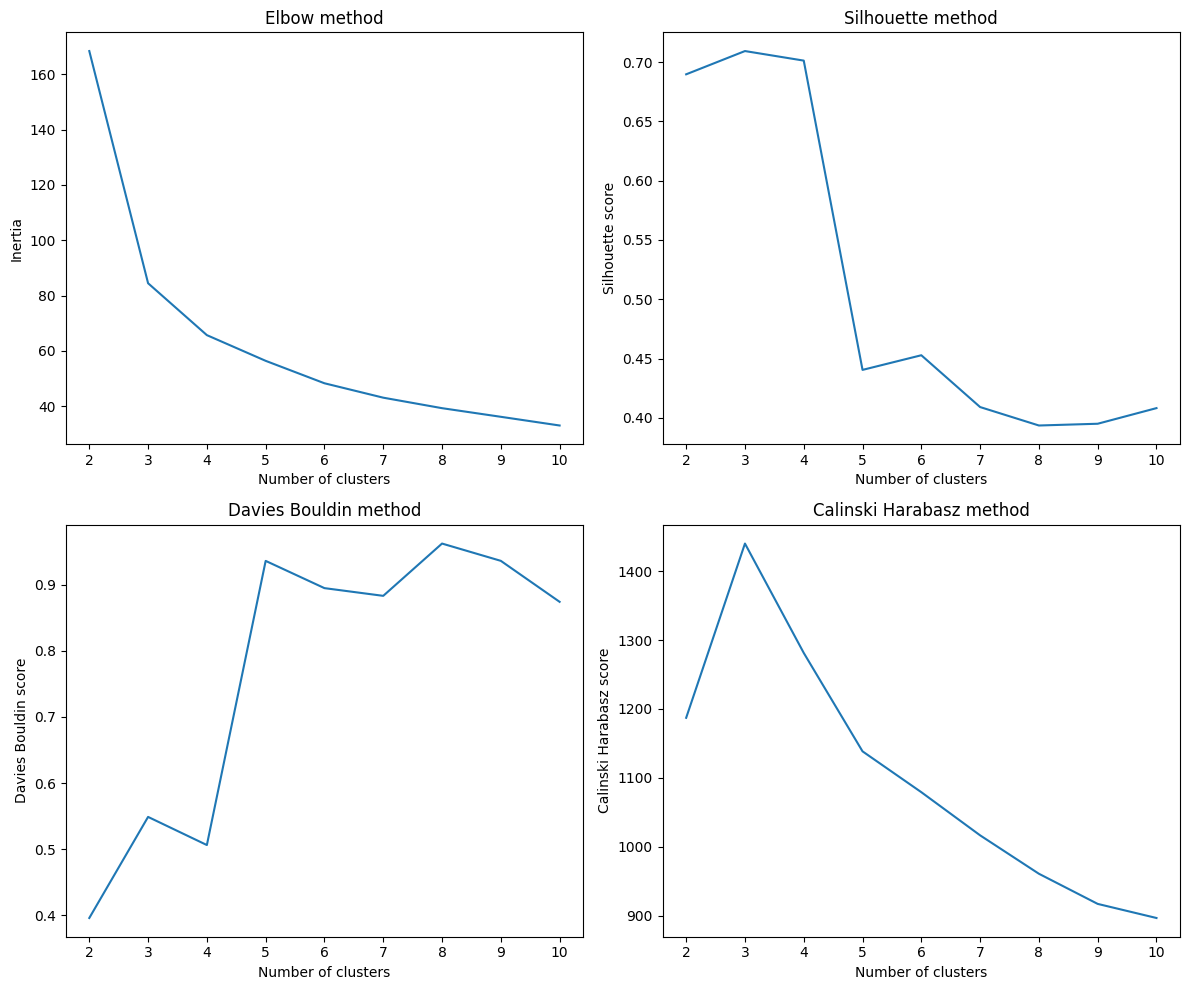

In [178]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Elbow method plot
axs[0, 0].plot(range(2, 11), inertia)
axs[0, 0].set_title("Elbow method")
axs[0, 0].set_xlabel("Number of clusters")
axs[0, 0].set_ylabel("Inertia")

# Silhouette method plot
axs[0, 1].plot(range(2, 11), silhouette_scores)
axs[0, 1].set_title("Silhouette method")
axs[0, 1].set_xlabel("Number of clusters")
axs[0, 1].set_ylabel("Silhouette score")

# Davies Bouldin method plot
axs[1, 0].plot(range(2, 11), db_scores)
axs[1, 0].set_title("Davies Bouldin method")
axs[1, 0].set_xlabel("Number of clusters")
axs[1, 0].set_ylabel("Davies Bouldin score")

# Calinski Harabasz method plot
axs[1, 1].plot(range(2, 11), ch_scores)
axs[1, 1].set_title("Calinski Harabasz method")
axs[1, 1].set_xlabel("Number of clusters")
axs[1, 1].set_ylabel("Calinski Harabasz score")

plt.tight_layout()
plt.show()

In [181]:
# run OPTICS clustering algorithm
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2, xi=.05,eps=0.1, min_cluster_size=.05)

optics.fit(sandil_df_)

optics_labels = optics.labels_

# get the 4 measures of cluster quality
print("Silhouette score: ", silhouette_score(sandil_df_, optics_labels))


Silhouette score:  0.5987873535425992


In [179]:
from sklearn.cluster import OPTICS
from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

# Define a range of values for each hyperparameter
params = {'min_samples': [2, 5, 10], 'eps': [0.1, 0.5, 1.0], 'xi': [0.05, 0.1, 0.2], 'min_cluster_size': [0.05, 0.1, 0.2]}

# Create an instance of the OPTICS algorithm
optics = OPTICS()

# Create an instance of the grid search object
grid_search = GridSearchCV(optics, params, scoring=silhouette_scorer, cv=5)

# Fit the grid search object to the data
grid_search.fit(sandil_df_)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_


In [180]:
best_params

{'eps': 0.1, 'min_samples': 2}